C:\Users\121731\AppData\Local\Temp\ipykernel_30296\688431752.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("seeds_dataset.txt", delim_whitespace=True, header=None)


k = 2, silhouette score = 0.4658
k = 3, silhouette score = 0.4007
k = 4, silhouette score = 0.3276
k = 5, silhouette score = 0.2849
k = 6, silhouette score = 0.2798
k = 7, silhouette score = 0.2709


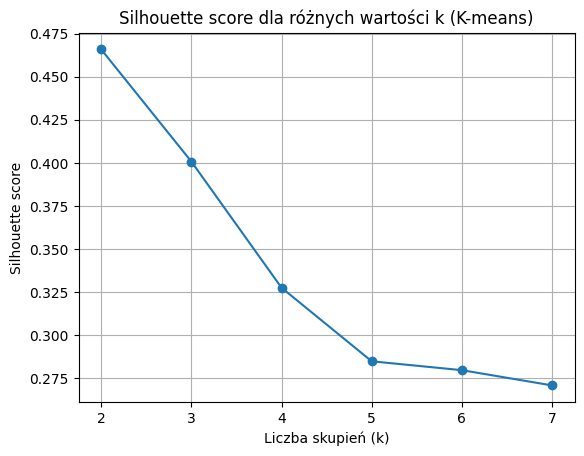

In [ ]:
#ZADANIE 1
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

df = pd.read_csv("seeds_dataset.txt", delim_whitespace=True, header=None)
df.columns = [
    'area', 'perimeter', 'compactness', 'length_of_kernel', 'width_of_kernel',
    'asymmetry_coefficient', 'length_of_kernel_groove', 'class'
]

X = df.drop(columns=['class'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k_values = range(2, 8)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)
    print(f"k = {k}, silhouette score = {score:.4f}")

plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette score dla różnych wartości k (K-means)")
plt.xlabel("Liczba skupień (k)")
plt.ylabel("Silhouette score")
plt.grid(True)
plt.show()


eps=0.2, min_samples=3, clusters=0 — zbyt mało skupień


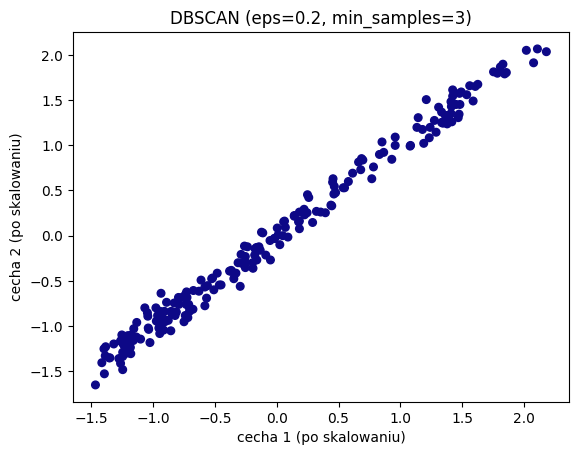

eps=0.2, min_samples=5, clusters=0 — zbyt mało skupień


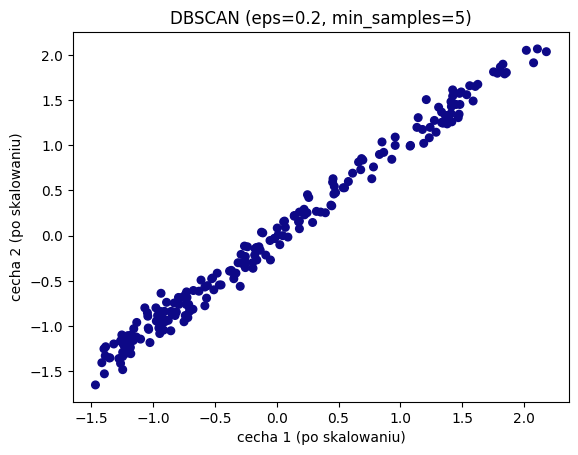

eps=0.2, min_samples=7, clusters=0 — zbyt mało skupień


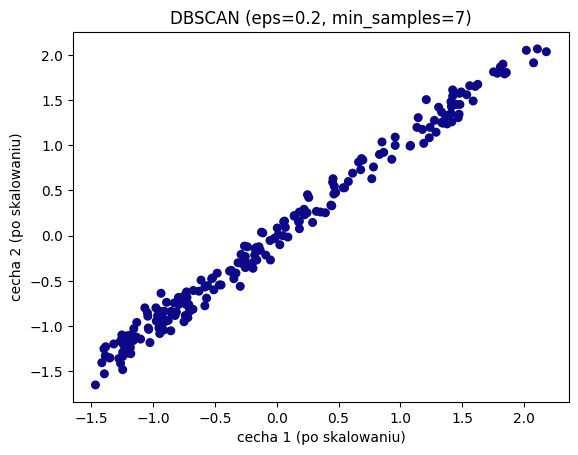

eps=0.2, min_samples=10, clusters=0 — zbyt mało skupień


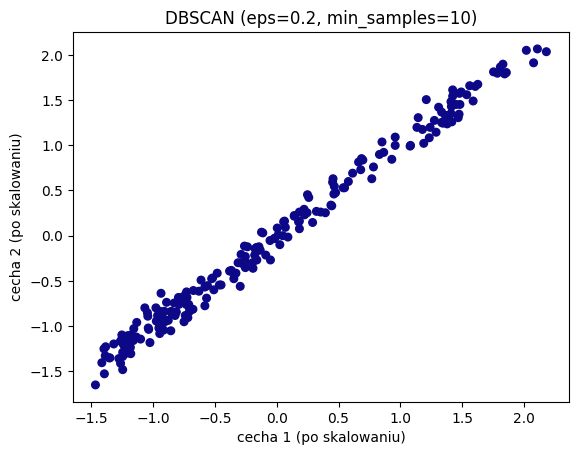

eps=0.4, min_samples=3, clusters=8, silhouette=-0.4758


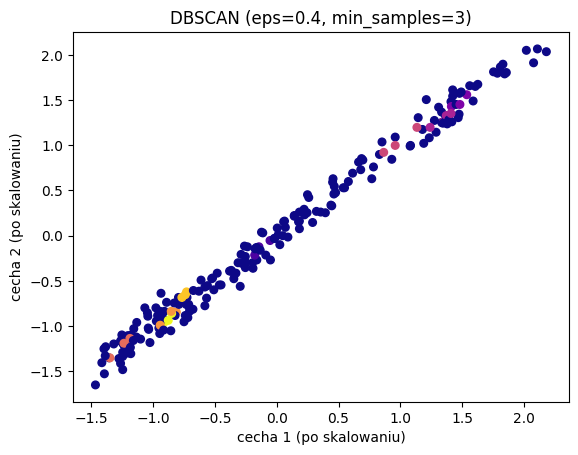

eps=0.4, min_samples=5, clusters=0 — zbyt mało skupień


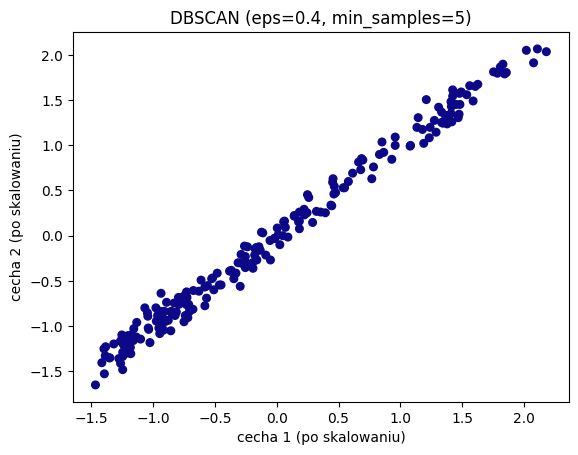

eps=0.4, min_samples=7, clusters=0 — zbyt mało skupień


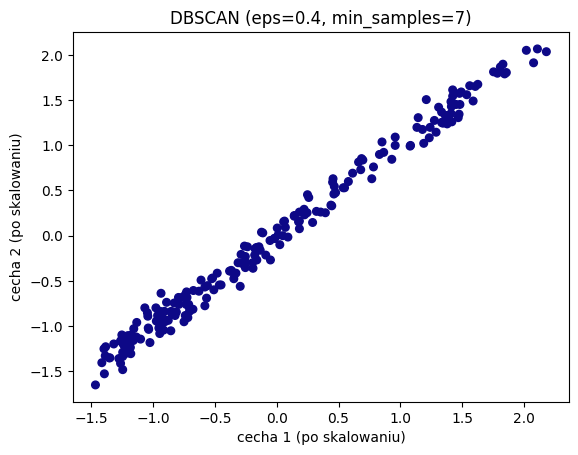

eps=0.4, min_samples=10, clusters=0 — zbyt mało skupień


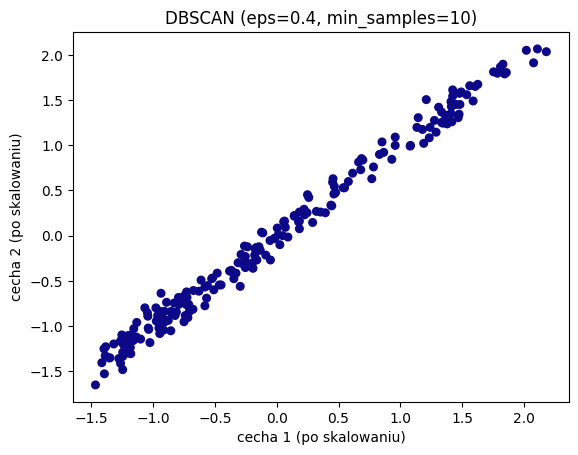

eps=0.6, min_samples=3, clusters=12, silhouette=-0.1396


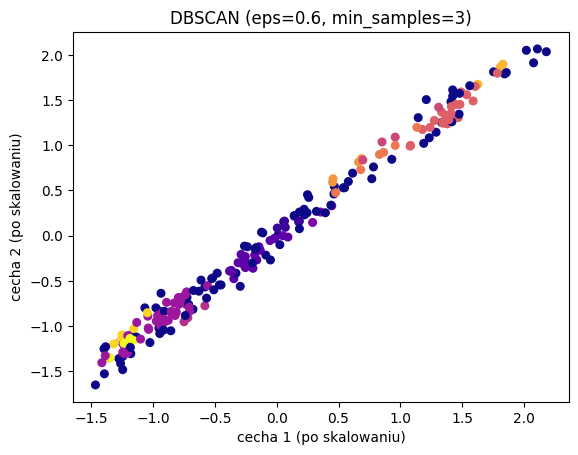

eps=0.6, min_samples=5, clusters=5, silhouette=-0.2968


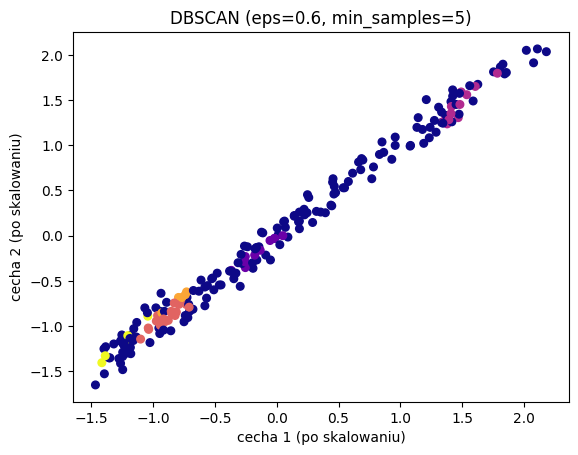

eps=0.6, min_samples=7, clusters=3, silhouette=-0.3868


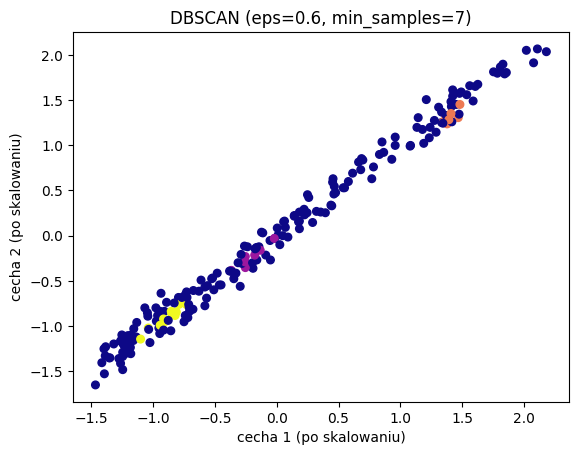

eps=0.6, min_samples=10, clusters=0 — zbyt mało skupień


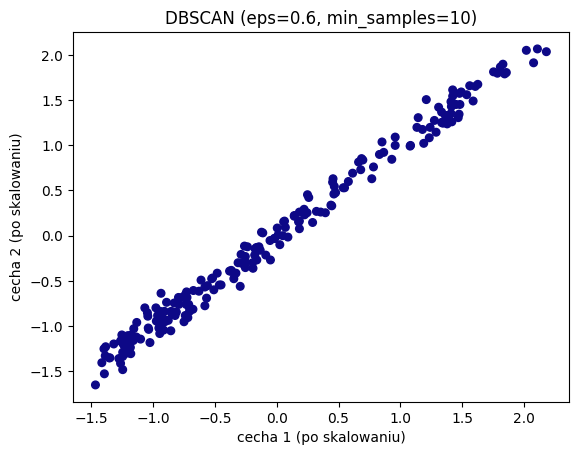

eps=0.8, min_samples=3, clusters=4, silhouette=0.0247


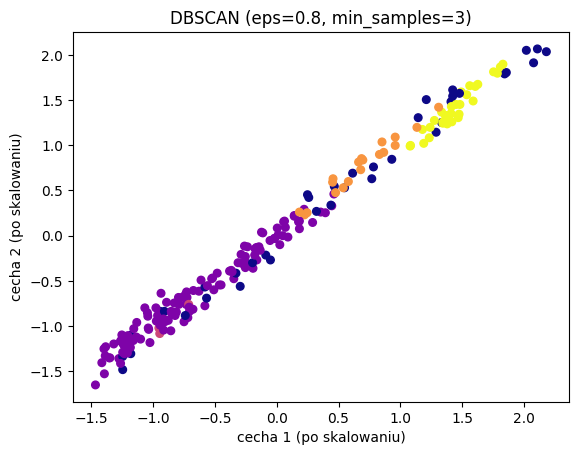

eps=0.8, min_samples=5, clusters=3, silhouette=0.1548


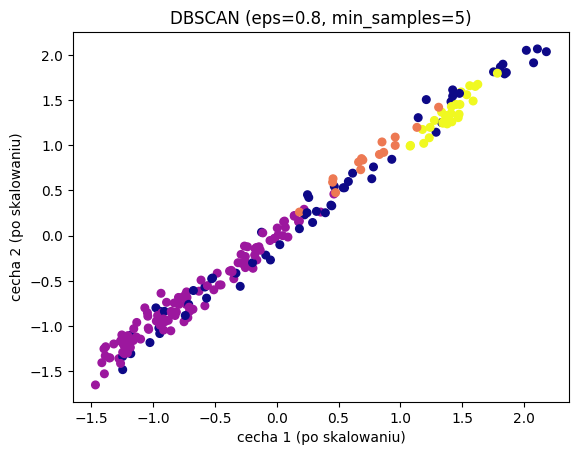

eps=0.8, min_samples=7, clusters=4, silhouette=0.0760


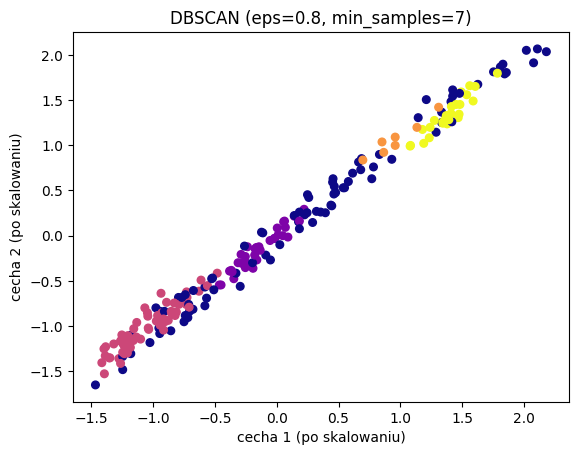

eps=0.8, min_samples=10, clusters=3, silhouette=-0.0008


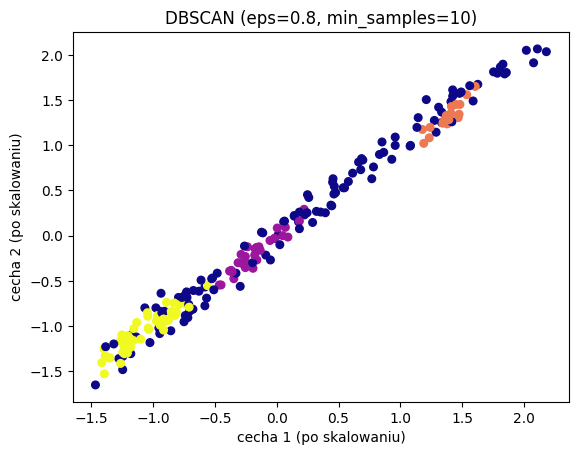

eps=1.0, min_samples=3, clusters=1 — zbyt mało skupień


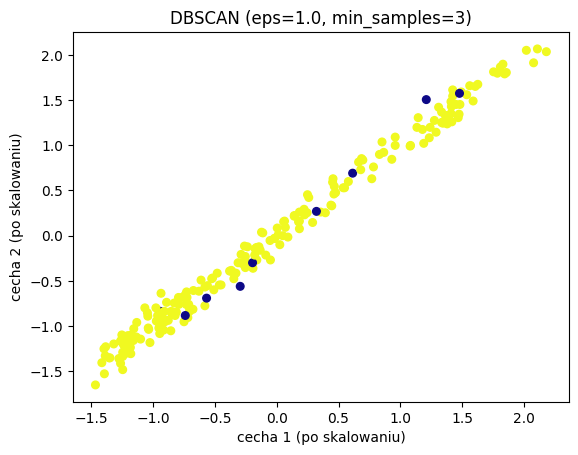

eps=1.0, min_samples=5, clusters=1 — zbyt mało skupień


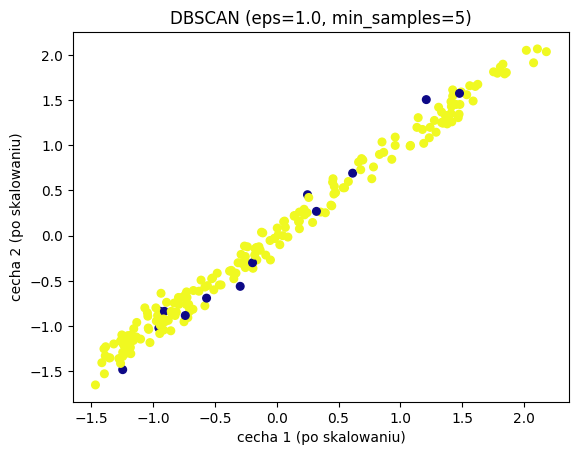

eps=1.0, min_samples=7, clusters=2, silhouette=-0.0946


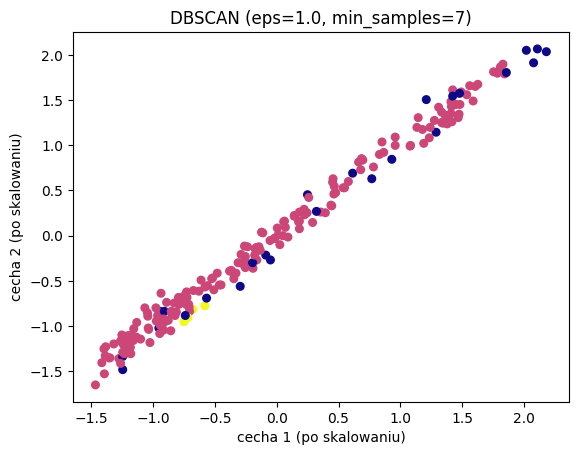

eps=1.0, min_samples=10, clusters=2, silhouette=0.2541


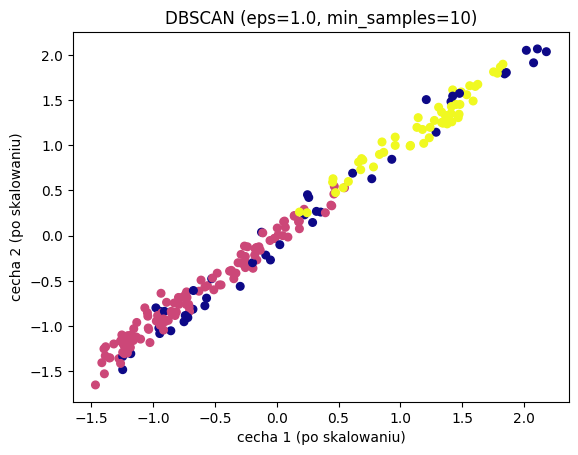

In [2]:
#Zadanie 2
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

eps_values = [0.2, 0.4, 0.6, 0.8, 1.0]
min_samples_values = [3, 5, 7, 10]

for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(X_scaled)

        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        if n_clusters > 1:
            score = silhouette_score(X_scaled, labels)
            print(f"eps={eps}, min_samples={min_samples}, clusters={n_clusters}, silhouette={score:.4f}")
        else:
            print(f"eps={eps}, min_samples={min_samples}, clusters={n_clusters} — zbyt mało skupień")

        # Wykres
        plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='plasma', s=30)
        plt.title(f'DBSCAN (eps={eps}, min_samples={min_samples})')
        plt.xlabel('cecha 1 (po skalowaniu)')
        plt.ylabel('cecha 2 (po skalowaniu)')
        plt.show()


K-means (k=3): clusters = 3, silhouette = 0.4007


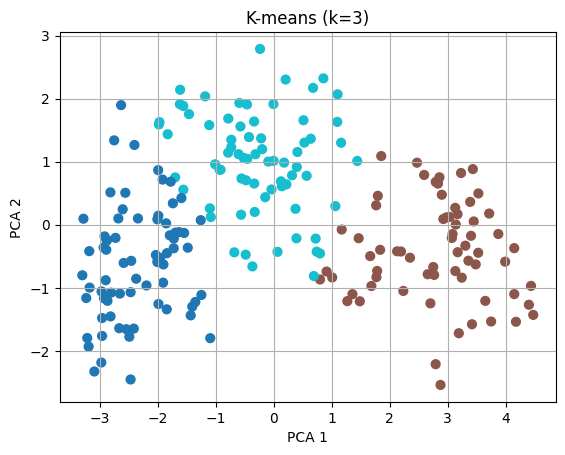

DBSCAN (eps=0.6, min_samples=5): clusters = 5, silhouette = -0.2968


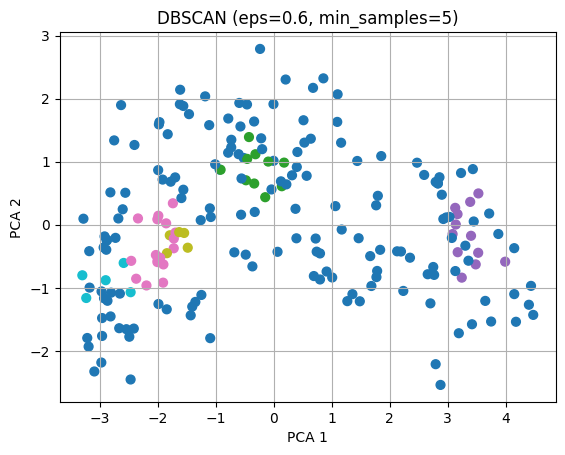

Agglomerative (n=3): clusters = 3, silhouette = 0.3926


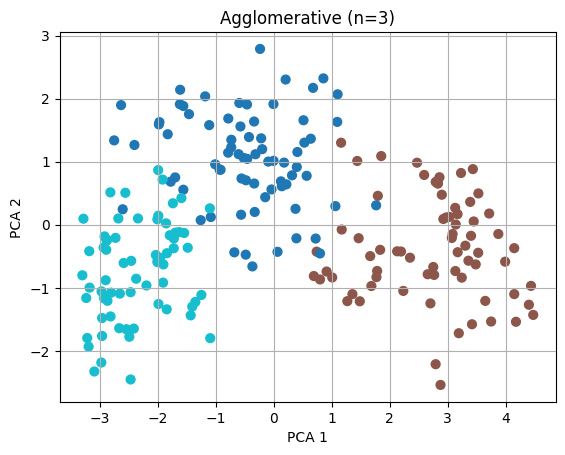

In [3]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

algorithms = {
    "K-means (k=3)": KMeans(n_clusters=3, random_state=42, n_init=10),
    "DBSCAN (eps=0.6, min_samples=5)": DBSCAN(eps=0.6, min_samples=5),
    "Agglomerative (n=3)": AgglomerativeClustering(n_clusters=3)
}
for name, algorithm in algorithms.items():
    labels = algorithm.fit_predict(X_scaled)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

    if n_clusters > 1:
        silhouette = silhouette_score(X_scaled, labels)
        print(f"{name}: clusters = {n_clusters}, silhouette = {silhouette:.4f}")
    else:
        print(f"{name}: clusters = {n_clusters}, silhouette = brak (za mało klastrów)")

    # Wizualizacja
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', s=40)
    plt.title(f"{name}")
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.grid(True)
    plt.show()
